In [134]:
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import interpolate
import scipy
from scipy.ndimage.filters import gaussian_filter

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sb

import math

plt.style.use('ggplot')  # стиль графиков

%matplotlib inline

C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_9752\37518819.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [135]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(3)
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,64,Female,Former,21.48380,Often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Not often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,Female,Former,25.89669,No,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216
311,45,Female,Never,23.82703,Often,1841.1,84.2,14.1,2.2,257.7,1665,465,80,328
312,49,Female,Never,24.26126,Often,1125.6,44.8,11.9,4.0,150.5,6943,520,300,502
313,31,Female,Former,23.45255,Often,2729.6,144.4,13.2,2.2,381.8,741,644,121,684


# 9.3

In [136]:
X1 = df.C11.to_numpy()
X2 = df.C4.to_numpy()
Y = df.C13.to_numpy()

In [137]:
X1

array([1945, 2653, 6321, 1061, 2863, 1729, 5371,  823, 2895, 3307, 1714,
       2031, 1982, 2120, 1388, 3888, 2194, 3470, 2108, 1157, 1739, 1008,
        606, 1380, 4916, 4451, 5983, 2413, 3087,  521, 2431, 3141, 1668,
       4366,  494, 7026, 1529,  241,  998, 6082, 2741, 2100, 2359,  603,
       1625, 2888, 1099, 2103, 2260,  452, 3549, 2204, 4964, 1052, 3572,
       2902, 1788, 5111, 1378, 1431, 1727, 2893, 2524, 2533,  982, 1535,
        326, 1487, 1114, 1080, 2492, 1349, 6948, 1086, 2629, 1307, 1306,
       3465, 1846, 1334, 4848, 1734, 1120, 1498,  330, 5909, 3326, 2110,
       2719, 2309, 1153, 1432, 2493, 3054, 1861, 4268, 1652, 1802, 2308,
       1210,  214, 1370, 2354, 2446, 3473, 3359, 1062, 1489, 3982, 1656,
        768, 1496,  683,  885, 1662, 1552, 2144, 3567, 1423, 1293, 2111,
       2874, 1699,  954, 1368, 3318, 2247,  910, 1171, 2077, 1210, 1826,
       2628,  561, 1893, 1312, 1913,  924,  728, 4387, 1976, 2422, 1407,
       1301, 1112, 1052, 1008, 1054, 1484,  657,  6

In [138]:
X2

array([21.4838 , 23.87631, 20.0108 , 25.14062, 20.98504, 27.52136,
       22.01154, 28.75702, 23.07662, 34.96995, 20.94647, 36.43161,
       31.73039, 21.78854, 27.31916, 31.44674, 25.90246, 29.15264,
       38.18727, 25.89669, 24.45884, 22.72121, 24.08119, 23.15985,
       49.12033, 23.07662, 33.72441, 25.18267, 28.94981, 24.67999,
       28.40151, 20.5696 , 16.33114, 21.03125, 22.64384, 25.87867,
       35.36012, 25.94005, 21.99912, 22.51215, 27.49272, 27.49609,
       24.17971, 23.34593, 21.67837, 21.32906, 33.74417, 32.07484,
       31.66835, 25.11194, 20.40345, 39.22295, 19.9326 , 21.63617,
       29.00466, 18.83396, 29.11351, 32.34834, 23.85727, 19.409  ,
       16.63666, 23.37617, 30.29495, 22.57426, 26.36754, 23.54244,
       22.01188, 21.07775, 25.7393 , 25.18267, 25.20677, 30.70965,
       23.92168, 20.64102, 26.63693, 22.36111, 23.09389, 24.67999,
       21.33144, 25.11989, 28.40199, 21.83403, 29.03568, 29.24145,
       19.98613, 24.08119, 23.34593, 25.14062, 27.22886, 27.98

In [139]:
Y

array([ 200,  124,  328,  153,   92,  148,  258,   64,  218,   81,  184,
         91,  120,   61,  108,  211,  235,  288,  102,  113,   74,  129,
        140,  138,  143,  416,  212,  786,   35,  122,  119,  182,  186,
        216,  751,   39,  107,   74,  418, 1415,  400,  102,  135,   97,
        124,  195,  107,   53,  148,   77,  316,   77,  266,   39,  225,
        173,   79,  102,  158,  159,  157,   96,  160,  100,  293,  171,
         89,  109,  129,   87,  328,  298,  379,  204,   75,  127,  131,
         21,  233,   73,   25,  137,   82,  327,  142,   86,  150,   53,
        112,  104,  170,  150,  282,   91,  125,  282,   16,  129,  180,
         39,   54,   78,   34,   95,  174,   95,   97,  204,   25,  270,
        285,  110,  162,  179,  131,   86,  225,  249,  254,  189,  108,
        121,  238,  127,  141,  427,  305,   74,  156,  168,  116,  290,
        304,  198,  253,  148,  492,  156,   27,   52,  210,   83,  182,
         40,   69,  172,  253,  435,  429,  326,   

In [140]:
F = np.array([np.array([1] * len(X1)), X1, X2])  # transposed matrix
F1 = np.dot(F, F.transpose())
F2 = np.dot(np.linalg.inv(F1), F)
betas = np.dot(F2, Y)
beta_0, beta_1, beta_2 = betas
print(f'{beta_0 = }')
print(f'{beta_1 = }')
print(f'{beta_2 = }')

beta_0 = 310.7223673918317
beta_1 = 0.027722236638042377
beta_2 = -6.935715932558693


In [141]:
def f(x1, x2):
    return beta_0 + beta_1 * x1 + beta_2 * x2

In [142]:
model = LinearRegression()
inp = np.array([X1, X2]).transpose()
model.fit(inp, Y)
model.score(inp, Y)

0.10246793843148871

In [143]:
model.intercept_, model.coef_

(310.7223673918337, array([ 0.02772224, -6.93571593]))

In [144]:
n = len(X1)
n

315

In [247]:
D_res = np.sum((Y - f(X1, X2)) ** 2) / n

D_YX = np.sum((f(X1, X2) - np.mean(Y)) ** 2) / n

D_Y = np.var(Y)

print(f"Факторный признак: {D_YX:.2f}")
print(f"Остаточные признаки: {D_res:.2f}")
print(f"Все признаки: {D_Y:.2f}")
print(f"Проверка суммы: {D_YX + D_res:.2f}")

Факторный признак: 3420.69
Остаточные признаки: 29962.29
Все признаки: 33382.98
Проверка суммы: 33382.98


In [248]:
R_YX2 = D_YX / D_Y
R_YX2, np.sqrt(R_YX2)

(0.10246793843148777, 0.32010613619780515)

In [147]:
k = 3

In [148]:
D_YX1 = n * D_YX / (k - 1)
D_Y1 = n * D_Y / (n - k)
D_res1 = n * D_res / (n - 1)

In [251]:
print("Несмещенные оценки:")
print(f"Факторный признак: {D_YX1:.2f}")
print(f"Остаточные признаки: {D_res1:.2f}")
print(f"Все признаки: {D_Y1:.2f}")

Несмещенные оценки:
Факторный признак: 4719061.27
Остаточные признаки: 3431.58
Все признаки: 3453.58


In [249]:
print(f"Коэффициент детерминации: {R_YX2}")
print(f"Кореляционное отношение: {np.sqrt(R_YX2)}")

Коэффициент детерминации: 0.10246793843148777
Кореляционное отношение: 0.32010613619780515


In [151]:
t = st.t(n - k)
quantile = t.ppf(1 - (0.1 / 2))

F1 = np.dot(F, F.transpose())
F1 = np.linalg.inv(F1)


def phi(x1, x2):
    return np.array([1, x1, x2], dtype='object')
    # return np.concatenate([np.array([1] * len(x)), x, x ** 2]).reshape((3, len(x)))


def f_lower(x1, x2):
    return f(x1, x2) - quantile * np.sqrt(D_Y1 * phi(x1, x2).transpose() @ F1 @ phi(x1, x2))


def f_higher(x1, x2):
    return f(x1, x2) + quantile * np.sqrt(D_Y1 * phi(x1, x2).transpose() @ F1 @ phi(x1, x2))

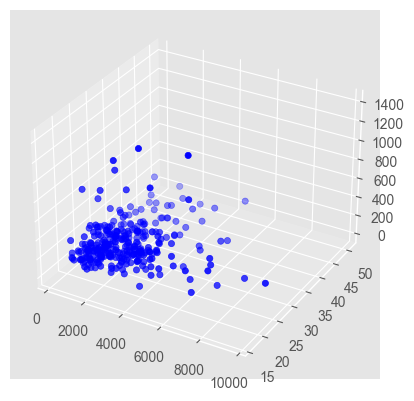

In [246]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

xxx = np.linspace(min(np.concatenate([X1, X2])), max(np.concatenate([X1, X2])), 1000)

ax.scatter(X1, X2, Y, color='blue')


plt.show()